In [ ]:
import io, random, base64, yaml
 
bbox = [random.randint(0, 50) for _ in range(4)]
class_id = "whale"
prob = round(random.uniform(0.8, 1.0), 3)

img_bytes: bytes = # Read this one /Users/savandanov/Documents/Github/whales-identification/data/datasets/000fe6ebfc9893.jpg

img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")
buf = io.BytesIO()
img.save(buf, format="PNG")
mask_b64 = base64.b64encode(buf.getvalue()).decode()

return {
    "image_ind": filename, # read from above
    "bbox": bbox,
    "class_animal": class_id,
    "id_animal": "23",# ID_TO_NAME.get(class_id, class_id),
    "probability": prob,
    "mask": mask_b64
}

In [ ]:
import io
import random
import base64
from PIL import Image

# Укажи путь к файлу
filename = "000fe6ebfc9893.jpg"
filepath = "/Users/savandanov/Documents/Github/whales-identification/data/datasets/" + filename

# Читаем байты изображения
with open(filepath, "rb") as f:
    img_bytes = f.read()

# Преобразуем изображение
img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")

# Сохраняем изображение в буфер в формате PNG
buf = io.BytesIO()
img.save(buf, format="PNG")
mask_b64 = base64.b64encode(buf.getvalue()).decode()

# Случайный bbox и вероятность
bbox = [random.randint(0, 50) for _ in range(4)]
class_id = "whale"
prob = round(random.uniform(0.8, 1.0), 3)

# Результат
result = {
    "image_ind": filename,
    "bbox": bbox,
    "class_animal": class_id,
    "id_animal": "23",
    "probability": prob,
    "mask": mask_b64
}

import yaml
print(yaml.dump(result, allow_unicode=True))


bbox:
- 26
- 29
- 2
- 45
class_animal: whale
id_animal: '23'
image_ind: 000fe6ebfc9893.jpg
mask: iVBORw0KGgoAAAANSUhEUgAABHUAAAMICAYAAABGidm8AAEAAElEQVR4nIT93ZIkS24mCH6Aqpl7ZJ46VUX2cHpuRqR3H6AfcO/2OfbNZrpbZKVnKCSriuQ5mRFuZqrAXgBQhVoEZb0kK09GuLuZqULx8+EDQP+v//f/RwFAVSEiICKUUkBEUFV0udBaQykF27Yt7+tQMFWc7QKA8TlmBgBc14Xn/hg/772j9w4AYAUUHVQLABnXI9HxHUQEIoKIgDF/BgDMjForBIrrsnuM9wOY/1143HO8iAhge9/ZxL9Xl8/FZ5h5PE98R9xT7x3SGlQVtVbUWkH+bwLQWkOtdbl+rQW1VgDwtZBxzbj3eL5SCsAFqrrcOzMDxdeii3+3oBT7brs/+/6rC2qtYK4QEYjYXkNtXRQd53lCRLBtG4gIrTVcp+1VyEPvHcdxQATj/s92QaTh7A29d5RSUEpBaw3nx4nzPMf6taPhui6/Bxlrltc65ENVx1q8Xi88n0/stY7fxxp0VQCMqzcwMx6PB/Z9R+8dr+uF1tqQS2aXA8x9hj8bbxUsavsFe76qtg6FfJ18a4SSTLgMUSU8tx3Ptx1vLgeFbT+v4wQAbI8HjvPEjx/v+Pn6wNWAt7c3PNjlQxu+ffuG83zhL3/5C4R8P7cy5L61hh8/f+Lnz59oraMQo58K7TLWRAlDXpgZTPb9Ted7Qp5V1Q6i/WOsOzOjwPYFYvvEoLH2sW+9d5RtX+SDfB8Atv3f7PpcfQ9knl2FoBCjtXPIhIgMXUNEOI7D5ZeH7MT5a2Iyd0mHXHbu4vl677iua6wDij3z6TLItWDfdzz3Bz4+PnAcBwDgsdvzaOumU+Kc+JpuXMbZPdqF47xAdeq363IZFtv/9/d3MDN+vv+OX3/

In [7]:
from rembg import remove
from PIL import Image
import base64
import io

def generate_base64_mask_with_removed_background(img_bytes: bytes) -> str:
    """
    Принимает байты изображения, удаляет фон и возвращает base64 PNG без фона.
    """
    # Удаление фона
    output = remove(img_bytes)
    
    # Преобразование результата в PNG и кодирование в base64
    processed_image = Image.open(io.BytesIO(output)).convert("RGBA")
    buf = io.BytesIO()
    processed_image.save(buf, format="PNG")
    return base64.b64encode(buf.getvalue()).decode(), processed_image


def detection_id(filename: str, img_bytes: bytes) -> dict:
    bbox = [random.randint(0, 50) for _ in range(4)]
    class_id = "whale"
    prob = round(random.uniform(0.8, 1.0), 3)

    img = Image.open(io.BytesIO(img_bytes)).convert("RGBA")
    buf = io.BytesIO()
    img.save(buf, format="PNG")
    
    mask_b64, processed = generate_base64_mask_with_removed_background(img_bytes)

    return {
        "image_ind": filename,
        "bbox": bbox,
        "class_animal": class_id,
        "id_animal": "23",
        "probability": prob,
        "mask": mask_b64,
        'processed': processed
    }

NameError: name 'processed' is not defined

In [9]:
filename = "000fe6ebfc9893.jpg"
filepath = "/Users/savandanov/Documents/Github/whales-identification/data/datasets/" + filename

# Чтение байтов изображения
with open(filepath, "rb") as f:
    img_bytes = f.read()

# Генерация base64-маски с удалённым фоном
mask_b64,processed = generate_base64_mask_with_removed_background(img_bytes)

# Генерация bbox и вероятности
bbox = [random.randint(0, 50) for _ in range(4)]
class_id = "whale"
prob = round(random.uniform(0.8, 1.0), 3)

# Результат
result = {
    "image_ind": filename,
    "bbox": bbox,
    "class_animal": class_id,
    "id_animal": "23",
    "probability": prob,
    "mask": mask_b64,
    'processed': processed

}

# Вывод в YAML
print(yaml.dump(result, allow_unicode=True))

bbox:
- 46
- 22
- 7
- 30
class_animal: whale
id_animal: '23'
image_ind: 000fe6ebfc9893.jpg
mask: iVBORw0KGgoAAAANSUhEUgAABHUAAAMICAYAAABGidm8AAEAAElEQVR4nOz9eZMkO3Ileh5VAGbmW2y53aX2Jrtfd8vM9/8uMzK9vukmm1V1l8yIcDcA+v4wgzsMbpFVRVbVzcx7fiLBiHC3PZLC64eqCoCIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIi

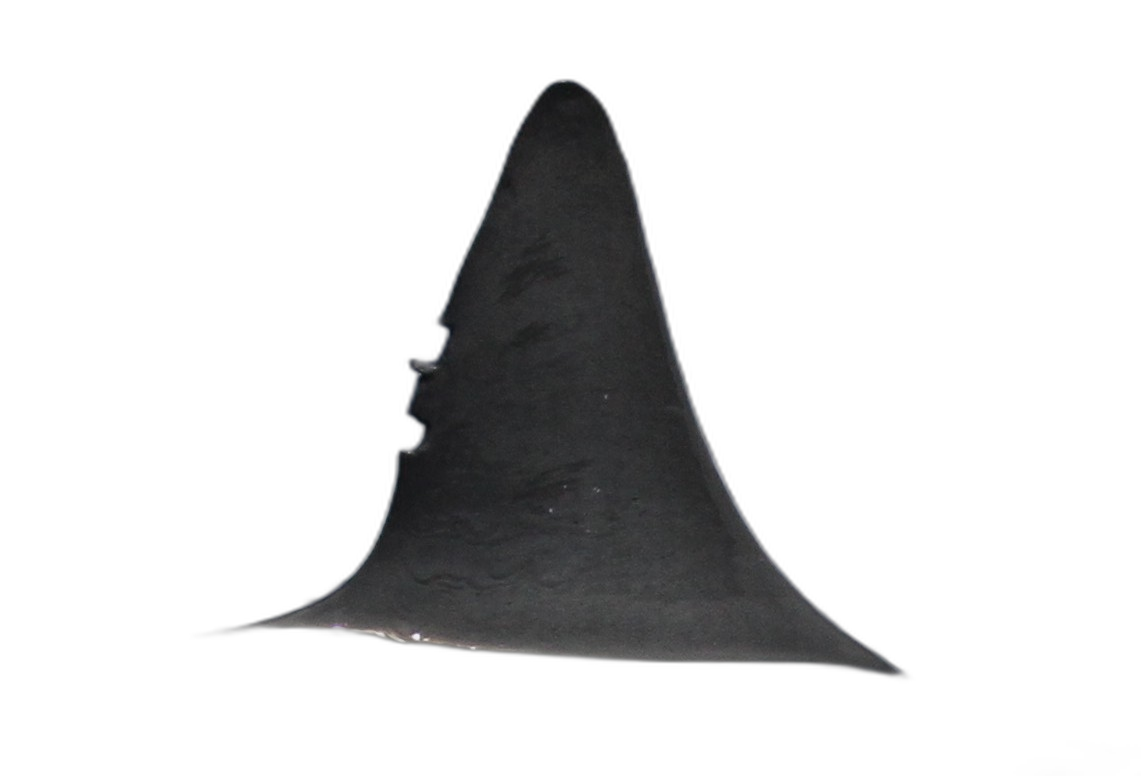

In [11]:
result['processed']

In [12]:
import yaml

with open("/Users/savandanov/Documents/Github/whales-identification/whales_be_service/src/whales_be_service/config.yaml", "r") as f:
    config = yaml.safe_load(f)

unique_names = set(config["id_to_name"].values())
print(f"Уникальных видов: {len(unique_names)}")
print("Список уникальных видов:", unique_names)


Уникальных видов: 30
Список уникальных видов: {'spotted_dolphin', 'rough_toothed_dolphin', 'pygmy_killer_whale', 'kiler_whale', 'fin_whale', 'commersons_dolphin', 'cuviers_beaked_whale', 'false_killer_whale', 'short_finned_pilot_whale', 'brydes_whale', 'white_sided_dolphin', 'pilot_whale', 'dusky_dolphin', 'pantropic_spotted_dolphin', 'sei_whale', 'long_finned_pilot_whale', 'gray_whale', 'blue_whale', 'common_dolphin', 'killer_whale', 'beluga', 'frasiers_dolphin', 'spinner_dolphin', 'melon_headed_whale', 'humpback_whale', 'globis', 'bottlenose_dolphin', 'bottlenose_dolpin', 'minke_whale', 'southern_right_whale'}


In [16]:
len(set(config['id_to_name'].keys()))

15587

In [21]:

# First pass: count occurrences
name_counts = {}
for name in config['id_to_name'].values():
    name_counts[name] = name_counts.get(name, 0) + 1

# Second pass: build new mapping with suffixes where necessary
new_mapping = {}
occ_tracker = {}
for key, name in config['id_to_name'].items():
    if name_counts[name] == 1:
        new_mapping[key] = name
    else:
        occ_tracker[name] = occ_tracker.get(name, 0) + 1
        new_mapping[key] = f"{name}_{occ_tracker[name]}"

# Prepare YAML output
new_yaml_content = yaml.safe_dump({'id_to_name': new_mapping}, allow_unicode=True, sort_keys=False)

# Save to file
output_path = 'config_suffix.yaml'
with open(output_path, 'w') as f_out:
    f_out.write(new_yaml_content)

In [20]:
new_yaml_content['id_to_name'].keys()

TypeError: string indices must be integers

In [ ]:
# whale_infer.py
import io, random, yaml, cv2, numpy as np, torch
from PIL import Image
from torch.utils.data import DataLoader
from albumentations.pytorch import ToTensorV2
import albumentations as A
import pandas as pd

# ---------- 1. модель, трансформы, датасет ---------- #

CONFIG = {
    "img_size": 448,
    "test_batch_size": 1,
    "num_classes": 15_587,
    "patch_size": 32,
    "device": torch.device("cuda:0" if torch.cuda.is_available() else "cpu"),
}

data_transforms = A.Compose(
    [
        A.Resize(CONFIG["img_size"], CONFIG["img_size"]),
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ],
    p=1.0,
)


class HappyWhaleTestDataset(torch.utils.data.Dataset):
    def __init__(self, img_list, transforms=None):
        self.img_list = img_list
        self.transforms = transforms

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img = self.img_list[idx]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transforms:
            img = self.transforms(image=img)["image"]
        return {"image": img}


# ---------- 2. архитектура (как в твоём коде) ---------- #

class AttentionBlock(torch.nn.Module):
    def __init__(self, embed_dim, hidden_dim, num_heads, dropout=0.0):
        super().__init__()
        self.norm1 = torch.nn.LayerNorm(embed_dim)
        self.attn = torch.nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout)
        self.norm2 = torch.nn.LayerNorm(embed_dim)
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(embed_dim, hidden_dim),
            torch.nn.GELU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_dim, embed_dim),
            torch.nn.Dropout(dropout),
        )

    def forward(self, x):
        y = self.norm1(x)
        x = x + self.attn(y, y, y)[0]
        x = x + self.mlp(self.norm2(x))
        return x


def img_to_patch(x, patch, flat=True):
    B, C, H, W = x.shape
    x = x.reshape(B, C, H // patch, patch, W // patch, patch)
    x = x.permute(0, 2, 4, 1, 3, 5).flatten(1, 2)
    if flat:
        x = x.flatten(2, 4)
    return x


class VisionTransformer(torch.nn.Module):
    def __init__(
        self,
        embed_dim,
        hidden_dim,
        num_channels,
        num_heads,
        num_layers,
        num_classes,
        patch_size,
        num_patches,
        dropout=0.0,
    ):
        super().__init__()
        self.patch_size = patch_size
        self.inp = torch.nn.Linear(num_channels * patch_size ** 2, embed_dim)
        self.blocks = torch.nn.Sequential(
            *[AttentionBlock(embed_dim, hidden_dim, num_heads, dropout) for _ in range(num_layers)]
        )
        self.mlp_head = torch.nn.Sequential(
            torch.nn.LayerNorm(embed_dim), torch.nn.Linear(embed_dim, num_classes)
        )
        self.cls_token = torch.nn.Parameter(torch.randn(1, 1, embed_dim))
        self.pos_emb = torch.nn.Parameter(torch.randn(1, 1 + num_patches, embed_dim))
        self.drop = torch.nn.Dropout(dropout)

    def forward(self, x):
        x = img_to_patch(x, self.patch_size)
        B, T, _ = x.shape
        x = self.inp(x)

        cls = self.cls_token.repeat(B, 1, 1)
        x = torch.cat([cls, x], 1) + self.pos_emb[:, : T + 1]
        x = self.drop(x).transpose(0, 1)  # [T+1, B, D]
        x = self.blocks(x)
        return self.mlp_head(x[0])


# ---------- 3. единоразовая инициализация ---------- #

# — ваш список классов в том же порядке, что использовался при обучении label-encoder
# CLASS_ID_LIST_PATH = "./class_ids_order.txt"  # по одному class_id на строку

# with open(CLASS_ID_LIST_PATH) as f:
#     CLASS_ID_LIST = [s.strip() for s in f if s.strip()]

# — словарь id → name (уникализированный)
CSV_PATH = "/Users/savandanov/Documents/Github/whales-identification/research/demo-ui/resources/database.csv"
df = pd.read_csv(CSV_PATH)
uniq_df = df.drop_duplicates("individual_id")        # ← только 15 587 строк
CLASS_ID_LIST = uniq_df["individual_id"].astype(str).tolist()

# ② Словарь id → species
ID_TO_NAME = dict(zip(uniq_df["individual_id"].astype(str), uniq_df["species"]))

# ③ Быстрая sanity-проверка
assert len(CLASS_ID_LIST) == 15_587, f"Ожидалось 15 587, а получили {len(CLASS_ID_LIST)}"
# — сама сеть
_model = VisionTransformer(
    embed_dim=784,
    hidden_dim=1568,
    num_heads=8,
    num_layers=6,
    patch_size=32,
    num_channels=3,
    num_patches=196,
    num_classes=len(CLASS_ID_LIST),
    dropout=0.2,
).to(CONFIG["device"]).eval()

ckpt = torch.load("/Users/savandanov/Documents/Github/whales-identification/research/demo-ui/models/model-e15.pt", map_location=CONFIG["device"])
_model.load_state_dict(ckpt["model_state_dict"], strict=False)


# ---------- 4. утилита удаления фона (из прошлых шагов) ---------- #

from rembg import remove
def generate_base64_mask_with_removed_background(img_bytes: bytes) -> str:
    import base64
    buf = io.BytesIO(remove(img_bytes))
    encoded = base64.b64encode(buf.getvalue()).decode()
    return encoded


# ---------- 5. Публичная функция ---------- #

def detection_id(filename: str, img_bytes: bytes) -> dict:
    """
    Принимает (имя_файла, байты_JPEG/PNG),
    возвращает dict с top-1 предсказанием ViT.
    """
    # --- prepare image for dataloader ---
    np_img = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)
    loader = DataLoader(
        HappyWhaleTestDataset([np_img], transforms=data_transforms),
        batch_size=1,
        shuffle=False,
    )

    with torch.no_grad():
        batch = next(iter(loader))["image"].to(CONFIG["device"])
        logits = _model(batch)
        probs = torch.softmax(logits, 1)
        top_prob, top_idx = probs[0].max(0)

    class_idx = int(top_idx.item())
    class_id = CLASS_ID_LIST[class_idx]          # hex-id из соревки
    name = ID_TO_NAME.get(class_id, class_id)    # читаемое имя / fallback

    # --- простая заглушка bbox (если ещё не детектируешь) ---
    bbox = [0, 0, np_img.shape[1], np_img.shape[0]]
    mask_b64 = generate_base64_mask_with_removed_background(img_bytes)

    return {
        "image_ind": filename,
        "bbox": bbox,                   # [xmin, ymin, xmax, ymax]
        "class_animal": class_id,       # hex-идентификатор
        "id_animal": name,              # читаемое имя
        "probability": round(float(top_prob), 4),
        "mask": mask_b64,
    }


# ---------- 6. быстрый тест ---------- #
if __name__ == "__main__":
    filename = "000fe6ebfc9893.jpg"
    test_path = "/Users/savandanov/Documents/Github/whales-identification/data/datasets/" + filename
    # test_path = "000fe6ebfc9893.jpg"
    with open(test_path, "rb") as f:
        res = detection_id(test_path, f.read())
    import pprint; pprint.pprint(res)


/var/folders/ls/gg2zdr3j6k1g3rh27w14m5c00000gn/T/ipykernel_40722/1861610564.py:151: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("/Users/savandanov/Docume

{'bbox': [0, 0, 1141, 776],
 'class_animal': '12540',
 'id_animal': 'white_sided_dolphin',
 'image_ind': '/Users/savandanov/Documents/Github/whales-identification/data/datasets/000fe6ebfc9893.jpg',
 'mask': 'iVBORw0KGgoAAAANSUhEUgAABHUAAAMICAYAAABGidm8AAEAAElEQVR4nOz9eZMkO3Ileh5VAGbmW2y53aX2Jrtfd8vM9/8uMzK9vukmm1V1l8yIcDcA+v4wgzsMbpFVRVbVzcx7fiLBiHC3PZLC64eqCoCIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiI

In [21]:
df

Unnamed: 0               image               species  individual_id
0               0  00021adfb725ed.jpg    melon_headed_whale          12348
1               1  000562241d384d.jpg        humpback_whale           1636
2               2  0007c33415ce37.jpg    false_killer_whale           5842
3               3  0007d9bca26a99.jpg    bottlenose_dolphin           4551
4               4  00087baf5cef7a.jpg        humpback_whale           8721
...           ...                 ...                   ...            ...
51028       51028  fff639a7a78b3f.jpg                beluga           5520
51029       51029  fff8b32daff17e.jpg  cuviers_beaked_whale           1096
51030       51030  fff94675cc1aef.jpg            blue_whale           5116
51031       51031  fffbc5dd642d8c.jpg                beluga           3909
51032       51032  fffdcd42312777.jpg    bottlenose_dolphin           4715

[51033 rows x 4 columns]

In [22]:
# once_build_meta.py
import pandas as pd, json, gzip, pathlib
df = pd.read_csv("/Users/savandanov/Documents/Github/whales-identification/research/demo-ui/resources/database.csv").drop_duplicates("individual_id")
meta = {
    "id_list" : df["individual_id"].astype(str).tolist(),
    "id2name" : dict(zip(df["individual_id"].astype(str), df["species"]))
}
pathlib.Path("whale_meta.json.gz").write_bytes(gzip.compress(json.dumps(meta).encode()))

100305

In [23]:
import json, gzip, pathlib
meta = json.loads(gzip.decompress(pathlib.Path("whale_meta.json.gz").read_bytes()))
ID_LIST = meta["id_list"]
ID2NAME = meta["id2name"]


In [24]:
ID_LIST

['12348',
 '1636',
 '5842',
 '4551',
 '8721',
 '11328',
 '10736',
 '4149',
 '13625',
 '10828',
 '1613',
 '1492',
 '675',
 '7912',
 '4153',
 '4345',
 '11488',
 '15550',
 '7354',
 '10309',
 '6631',
 '3265',
 '11697',
 '1082',
 '3708',
 '14980',
 '9140',
 '11860',
 '15079',
 '14228',
 '4249',
 '1495',
 '9904',
 '9784',
 '15520',
 '6054',
 '14059',
 '8867',
 '5626',
 '8995',
 '4213',
 '2491',
 '12341',
 '3791',
 '15392',
 '14044',
 '14513',
 '3398',
 '480',
 '15222',
 '4318',
 '12567',
 '13417',
 '3168',
 '14861',
 '15448',
 '203',
 '8008',
 '2896',
 '9414',
 '690',
 '2870',
 '2569',
 '14752',
 '15311',
 '11593',
 '13946',
 '429',
 '2881',
 '7099',
 '6259',
 '4196',
 '9728',
 '12430',
 '4968',
 '9714',
 '5953',
 '1598',
 '1749',
 '3230',
 '2968',
 '7194',
 '1343',
 '4091',
 '9379',
 '15494',
 '9544',
 '14553',
 '4701',
 '2107',
 '6073',
 '830',
 '14083',
 '11151',
 '3575',
 '11484',
 '5520',
 '4489',
 '4667',
 '5922',
 '2430',
 '13286',
 '13668',
 '3626',
 '14784',
 '12287',
 '1303',
 '107